In [22]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import confusion_matrix,roc_curve,auc

In [2]:
sample_size=1000
X,y = make_moons(n_samples=sample_size, noise=0.2, random_state=0)

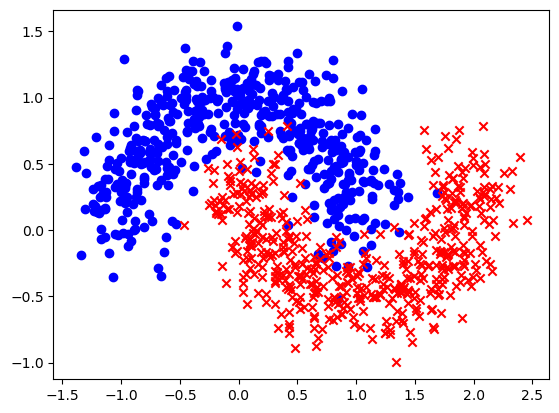

In [4]:
plt.scatter(X[y==0,0], X[y==0,1], color='blue', marker='o', label='Class 0')
plt.scatter(X[y==1,0], X[y==1,1], color='red', marker='x', label='Class 1')
plt.show()

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

In [10]:
log_reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [16]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

svm = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(kernel="rbf"))
])
svm.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

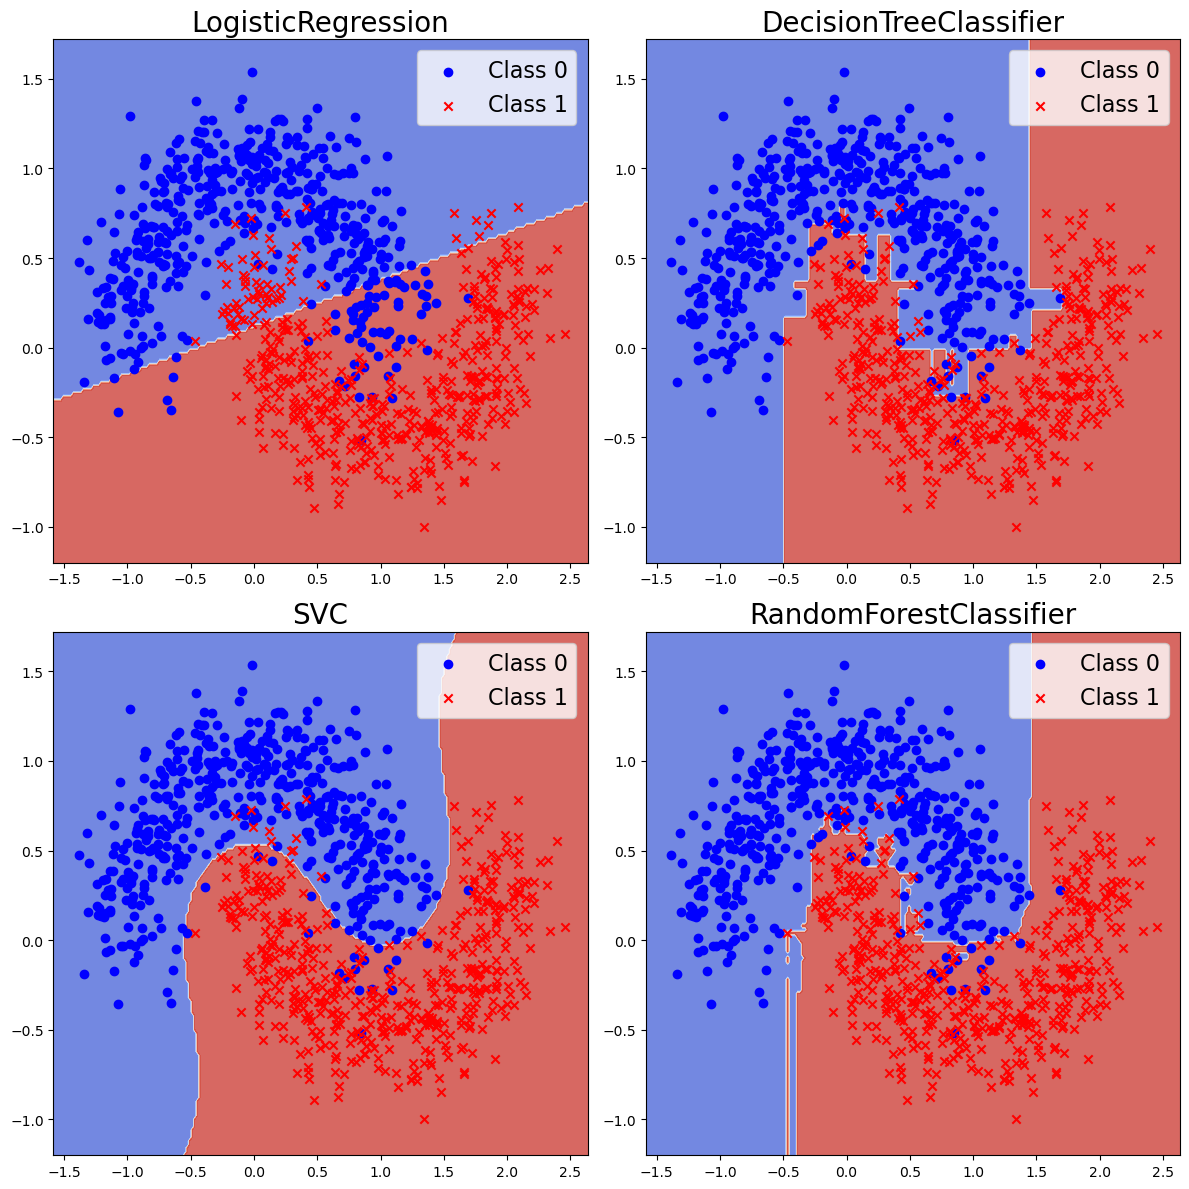

In [18]:
h=0.02
x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

def plot_decision_boundary(model, ax,X,y,xx,yy):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm,alpha=0.8)
    ax.scatter(X[y==0,0], X[y==0,1], color='blue', marker='o', label='Class 0')
    ax.scatter(X[y==1,0], X[y==1,1], color='red', marker='x', label='Class 1')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    model_name = model.__class__.__name__
    if model_name != 'Pipeline':
        ax.set_title(model_name,fontsize=20)
    else:
        model_name = model["model"].__class__.__name__
        ax.set_title(model_name,fontsize=20)
    ax.legend(fontsize=16)
fig,ax = plt.subplots(2,2,figsize=(12,12))
plot_decision_boundary(log_reg, ax[0,0],X,y,xx,yy)
plot_decision_boundary(dt, ax[0,1],X,y,xx,yy)
plot_decision_boundary(svm, ax[1,0],X,y,xx,yy)
plot_decision_boundary(rf, ax[1,1],X,y,xx,yy)
plt.tight_layout()
plt.show()

In [21]:
y_pred = log_reg.predict(X_val)
confusion = confusion_matrix(y_val, y_pred)
print('Confusion Matrix')
print(confusion)

precision = confusion[1,1] / (confusion[1,1] + confusion[0,1])
recall = confusion[1,1] / (confusion[1,1] + confusion[1,0])
print('Precision: ', precision)
print('Recall: ', recall)

Confusion Matrix
[[121  24]
 [ 23 132]]
Precision:  0.8461538461538461
Recall:  0.8516129032258064


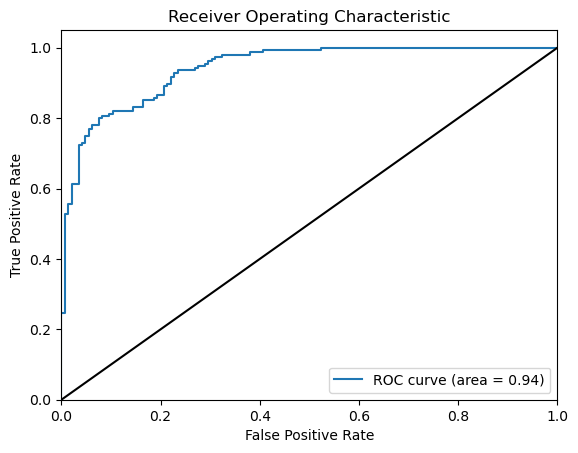

In [23]:
fpr, tpr, thresholds = roc_curve(y_val, log_reg.predict_proba(X_val)[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



In [24]:
y_dt_pred = dt.predict(X_val)
confusion = confusion_matrix(y_val, y_dt_pred)
print('Confusion Matrix')
print(confusion)

precision = confusion[1,1] / (confusion[1,1] + confusion[0,1])
recall = confusion[1,1] / (confusion[1,1] + confusion[1,0])
print('Precision: ', precision)
print('Recall: ', recall)

Confusion Matrix
[[137   8]
 [  6 149]]
Precision:  0.9490445859872612
Recall:  0.9612903225806452


In [25]:
y_svm_pred = svm.predict(X_val)
confusion = confusion_matrix(y_val, y_svm_pred)
print('Confusion Matrix')
print(confusion)

precision = confusion[1,1] / (confusion[1,1] + confusion[0,1])
recall = confusion[1,1] / (confusion[1,1] + confusion[1,0])
print('Precision: ', precision)
print('Recall: ', recall)


Confusion Matrix
[[139   6]
 [  3 152]]
Precision:  0.9620253164556962
Recall:  0.9806451612903225


In [26]:
y_rf_pred = rf.predict(X_val)
confusion = confusion_matrix(y_val, y_rf_pred)
print('Confusion Matrix')
print(confusion)

precision = confusion[1,1] / (confusion[1,1] + confusion[0,1])
recall = confusion[1,1] / (confusion[1,1] + confusion[1,0])
print('Precision: ', precision)

print('Recall: ', recall)

Confusion Matrix
[[137   8]
 [  5 150]]
Precision:  0.9493670886075949
Recall:  0.967741935483871
